# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Icha Aulia Putri Ambarwati
- Email: ichaaulia720@gmail.com | email cohort : a129xbf216@devacademy.id
- Id Dicoding: icha_aulia

## Persiapan

### Menyiapkan library yang dibutuhkan

In [69]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

### Menyiapkan data yang akan diguankan

## Data Understanding

In [75]:
df = pd.read_csv('/content/drive/MyDrive/File Submission/employee_data.csv')

In [5]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [6]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1470
Number of columns: 35


Dari sini terdapat 35 Fitur dan 1470 data

In [7]:
print("Available Features:\n", df.columns.tolist())

Available Features:
 ['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [8]:
# Check for missing values
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat missing value sebesar 412 pada kolom Attrition

In [9]:
# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


Tidak ditemukan data duplikat.

In [10]:
#Check for outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(df['Age'])
print(f"\nOutliers in 'Age' column:\n{outliers}")


Outliers in 'Age' column:
Series([], Name: Age, dtype: int64)


Tidak ditemukan Outliers pada kolom Age yang dimana ini rentan Outlier.

In [11]:
# Get information about the DataFrame (columns, rows, data types)
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int6

In [12]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0         

Tidak ditemukan Outlier atau data yang aneh dalam dataset ini.

# **Exploratory  Data Analyst**

Distribution of EmployeeId:
count    1470.000000
mean      735.500000
std       424.496761
min         1.000000
25%       368.250000
50%       735.500000
75%      1102.750000
max      1470.000000
Name: EmployeeId, dtype: float64


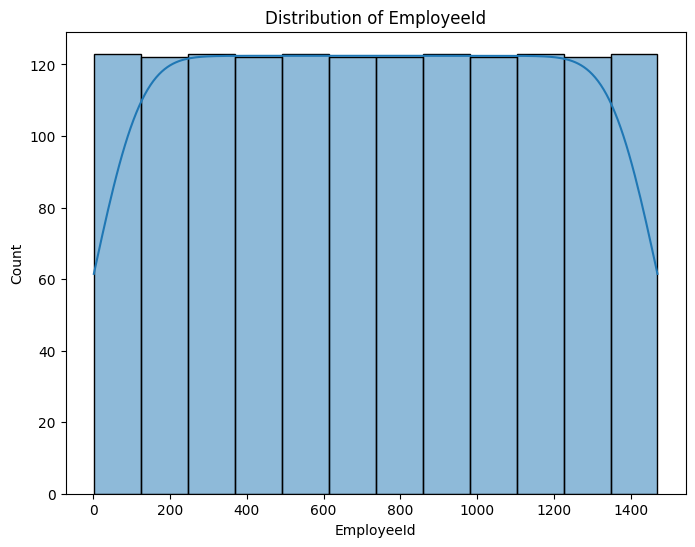

Distribution of Age:
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


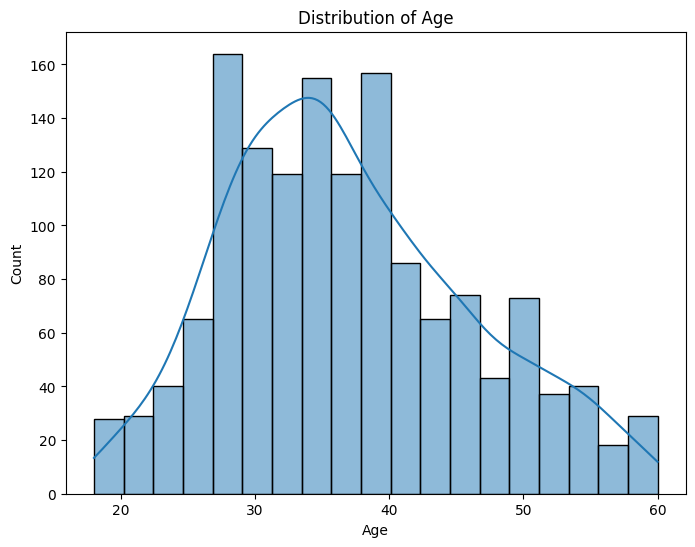

Distribution of Attrition:
count    1058.000000
mean        0.169187
std         0.375094
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Attrition, dtype: float64


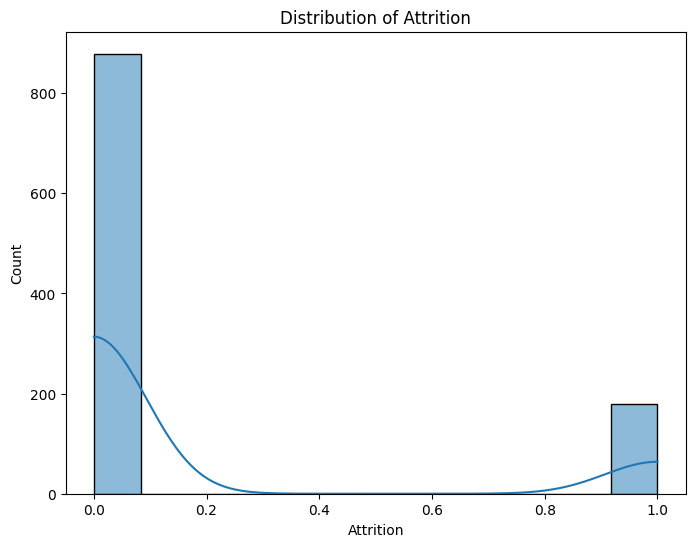

<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


Distribution of BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


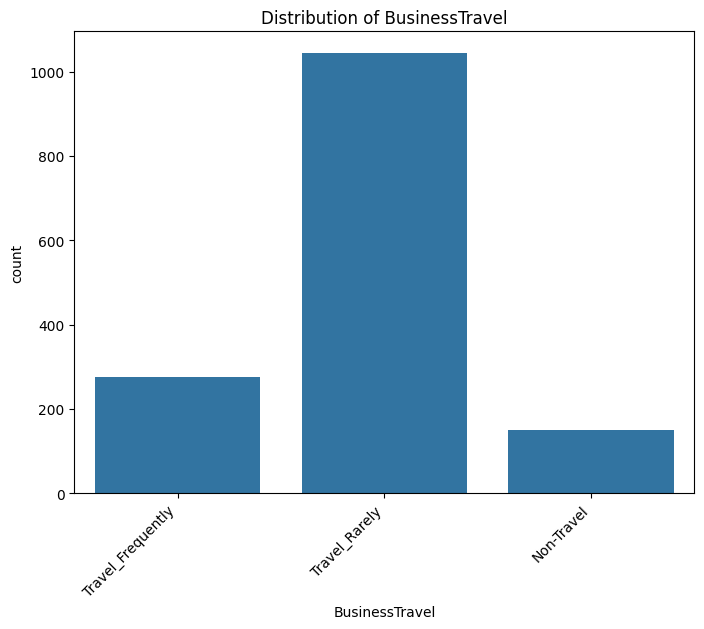

Distribution of DailyRate:
count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64


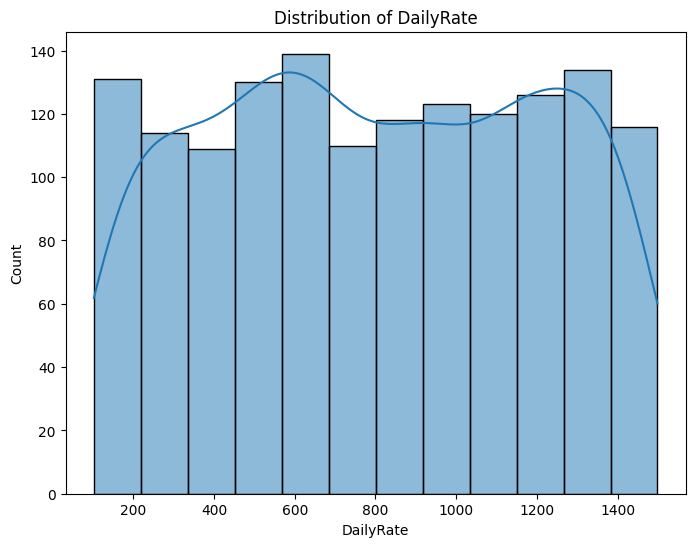

<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


Distribution of Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


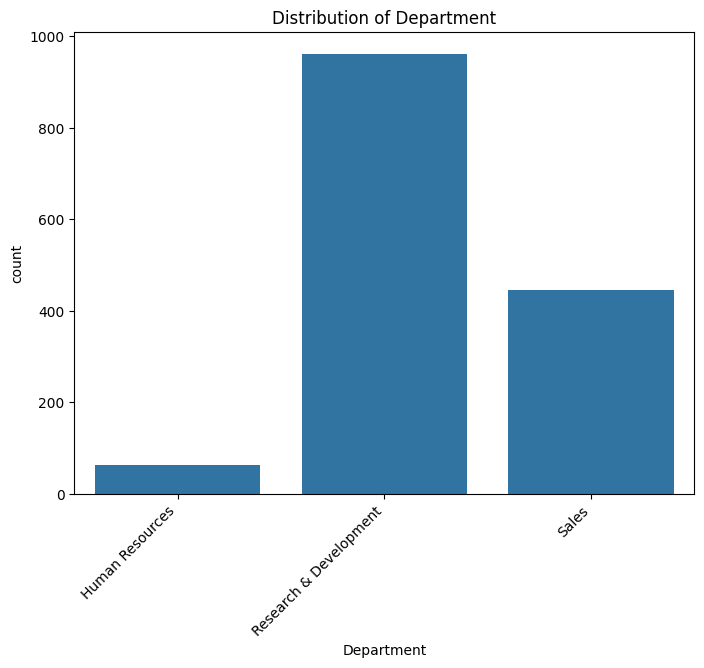

Distribution of DistanceFromHome:
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


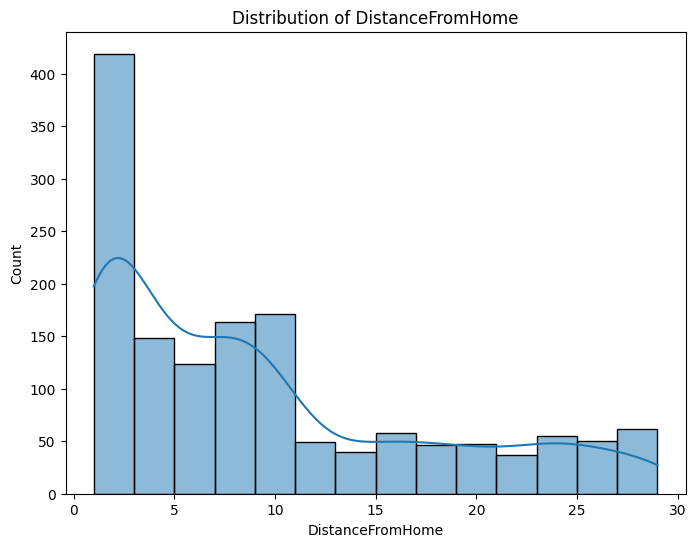

Distribution of Education:
count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64


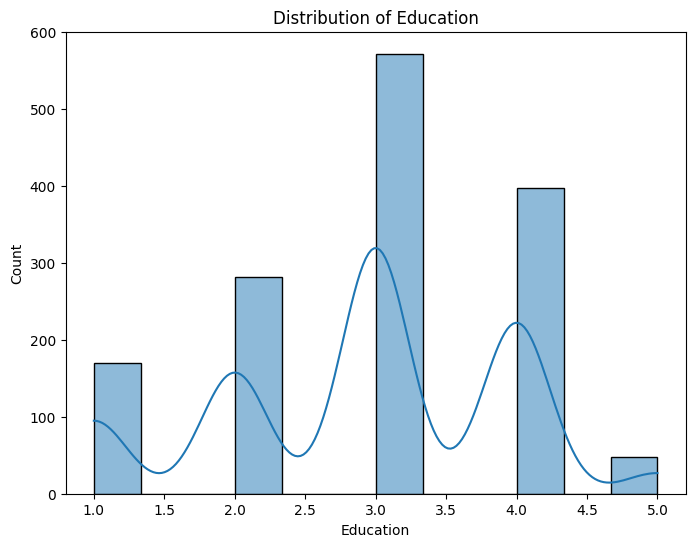

<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


Distribution of EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


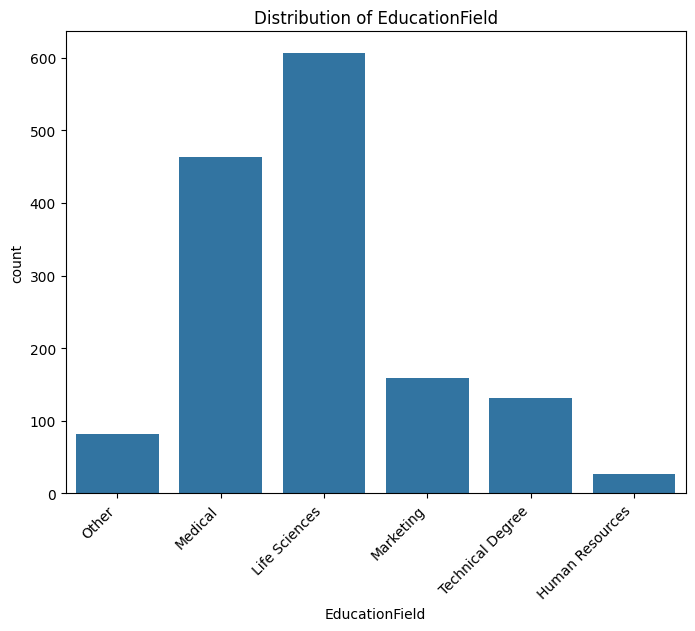

Distribution of EmployeeCount:
count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64


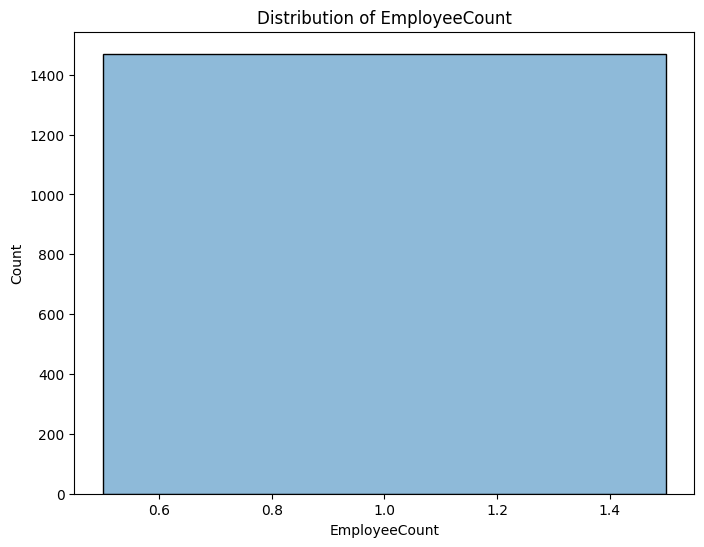

Distribution of EnvironmentSatisfaction:
count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64


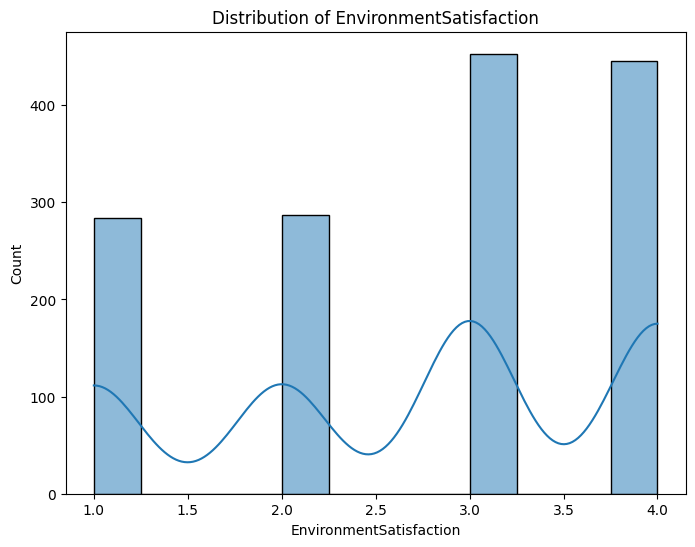

Distribution of Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64


<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


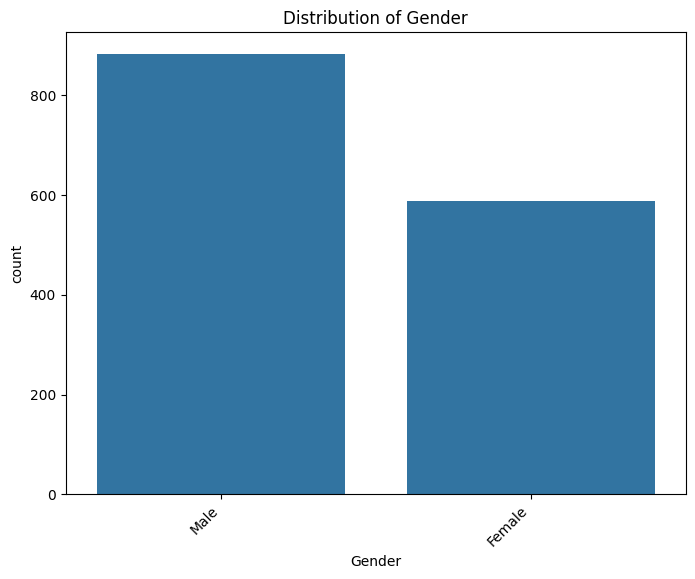

Distribution of HourlyRate:
count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64


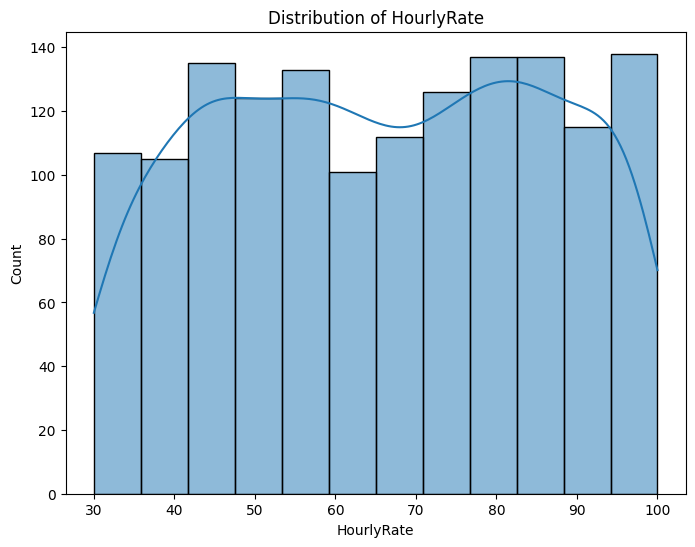

Distribution of JobInvolvement:
count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64


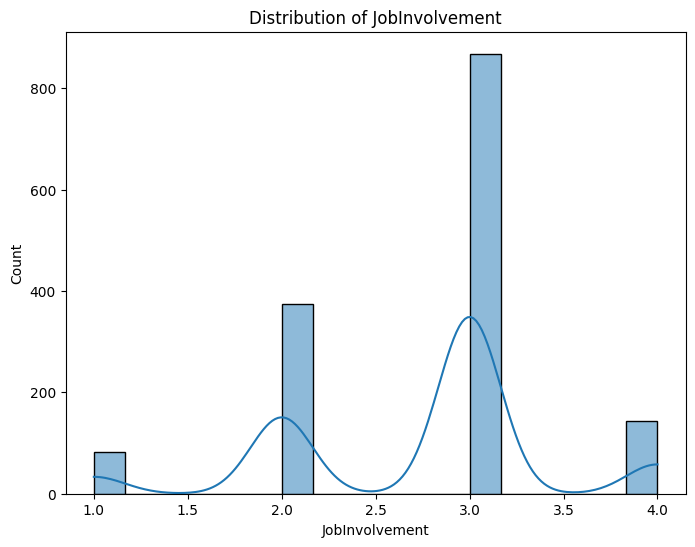

Distribution of JobLevel:
count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64


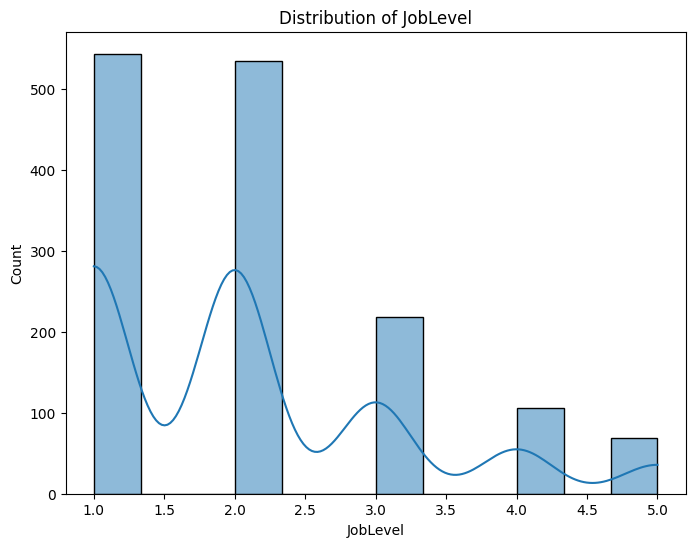

<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


Distribution of JobRole:
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


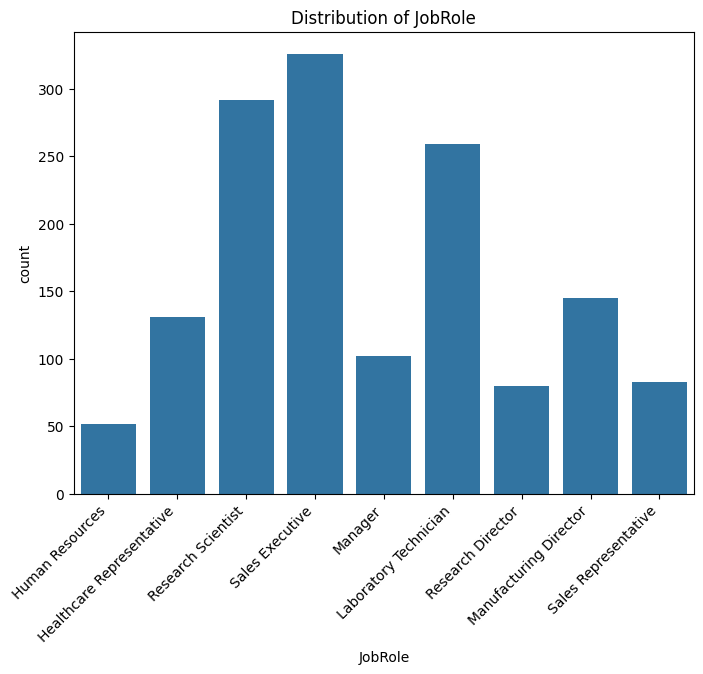

Distribution of JobSatisfaction:
count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64


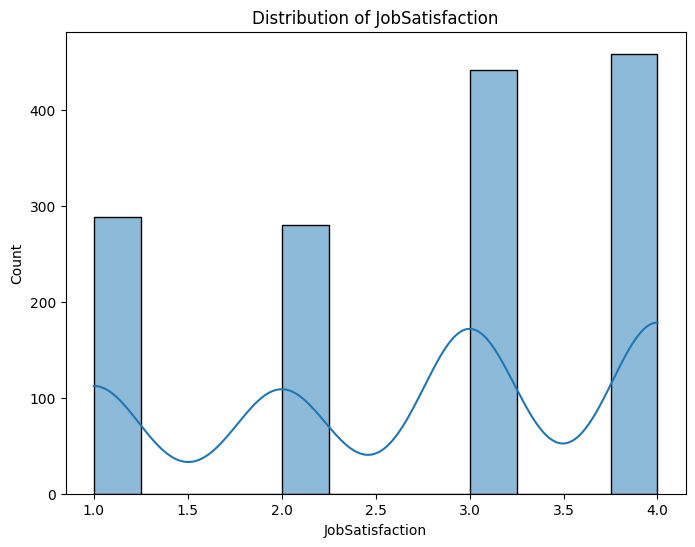

<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


Distribution of MaritalStatus:
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


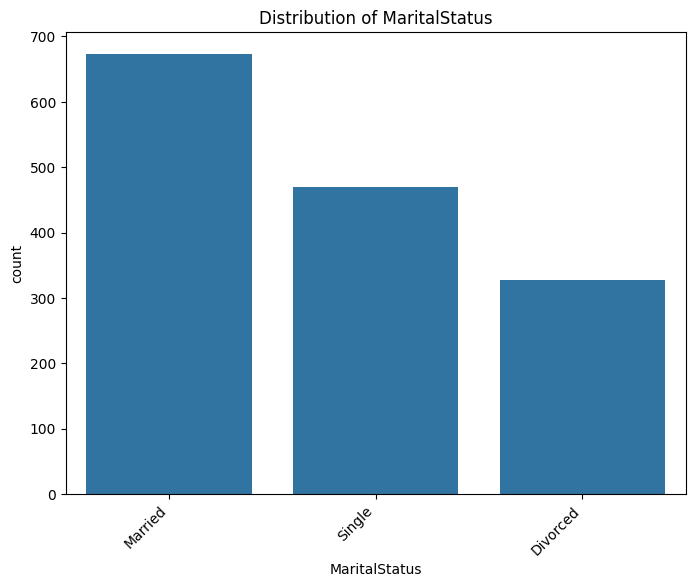

Distribution of MonthlyIncome:
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


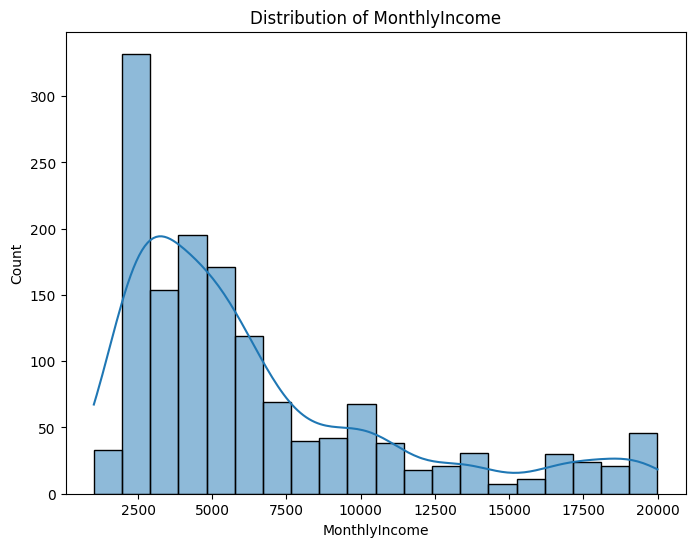

Distribution of MonthlyRate:
count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64


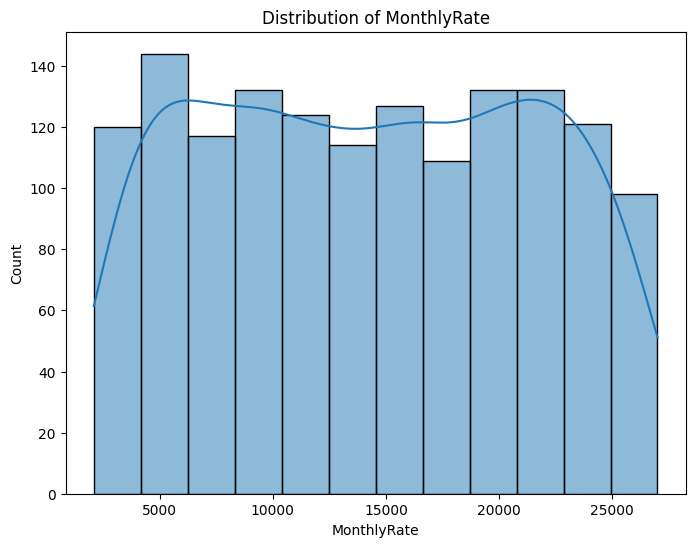

Distribution of NumCompaniesWorked:
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64


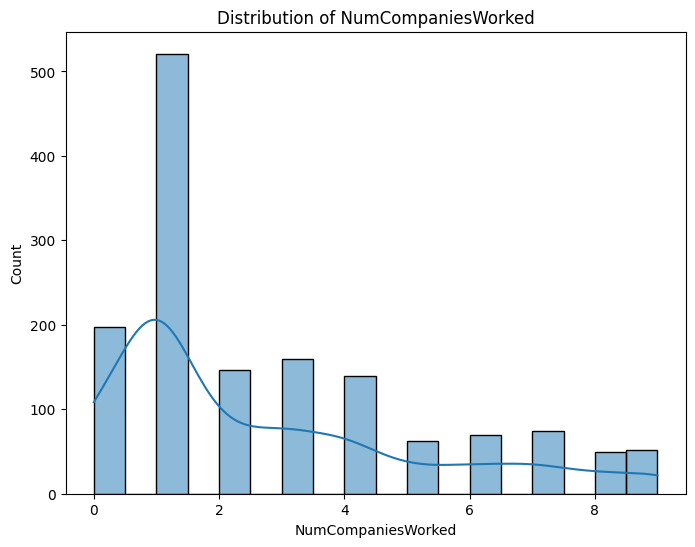

Distribution of Over18:
Over18
Y    1470
Name: count, dtype: int64


<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


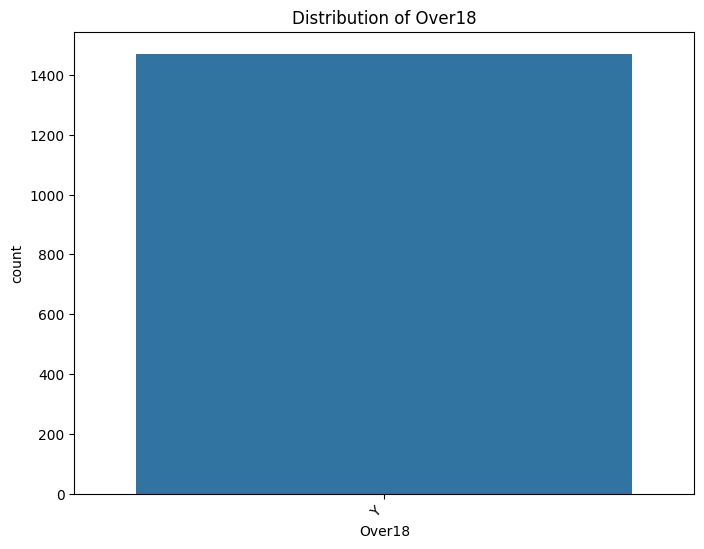

<ipython-input-13-10302402af91>:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):


Distribution of OverTime:
OverTime
No     1054
Yes     416
Name: count, dtype: int64


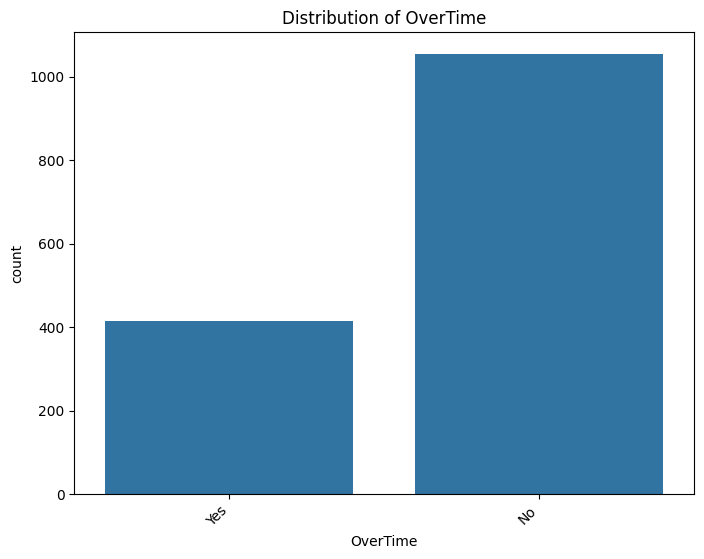

Distribution of PercentSalaryHike:
count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64


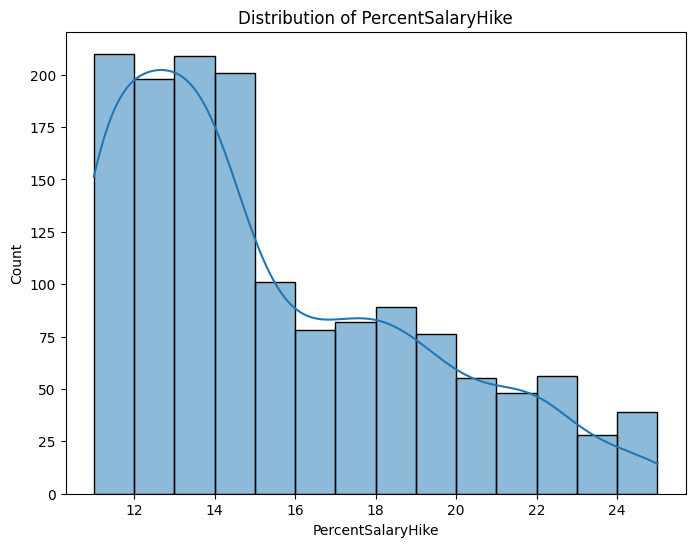

Distribution of PerformanceRating:
count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64


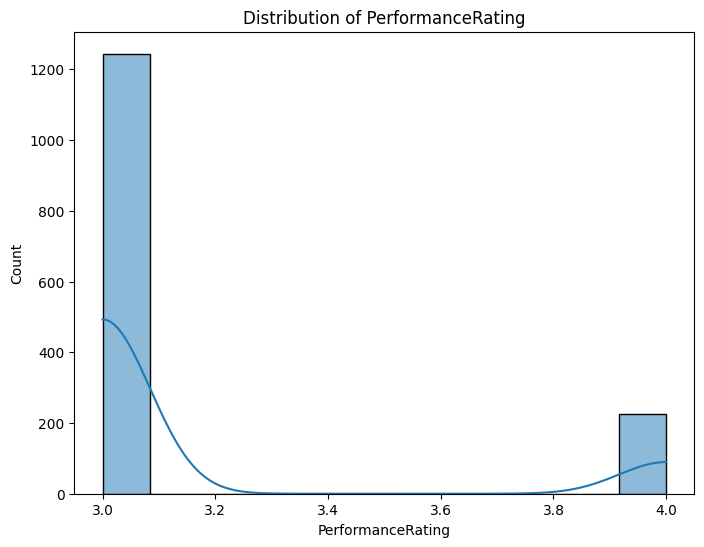

Distribution of RelationshipSatisfaction:
count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64


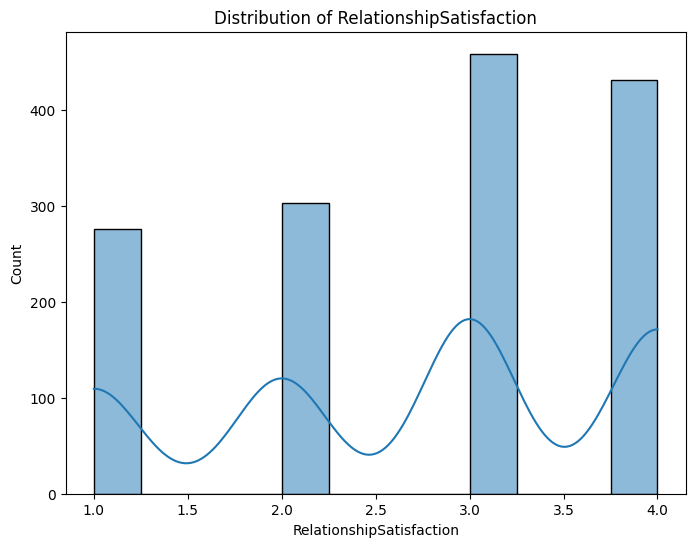

Distribution of StandardHours:
count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64


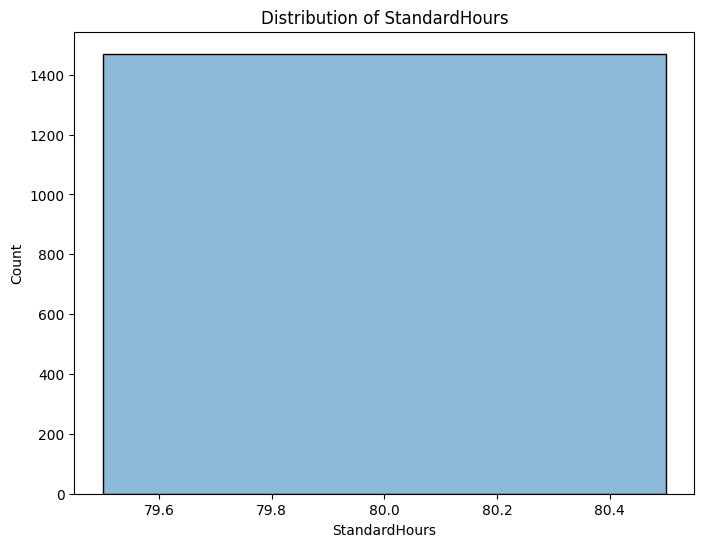

Distribution of StockOptionLevel:
count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64


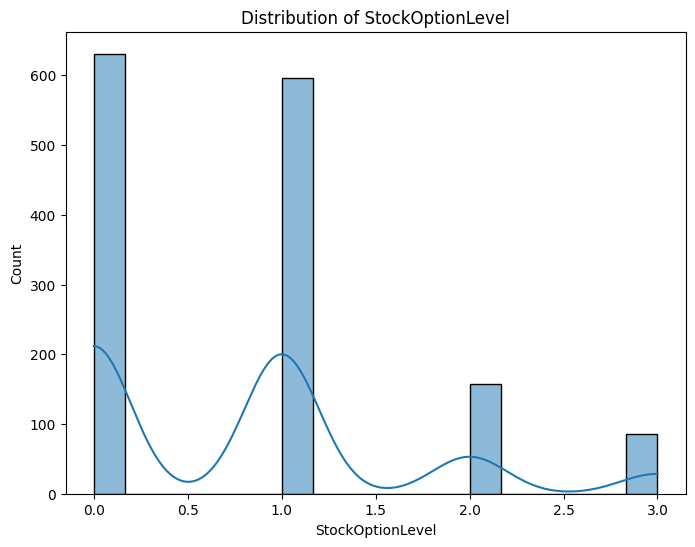

Distribution of TotalWorkingYears:
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


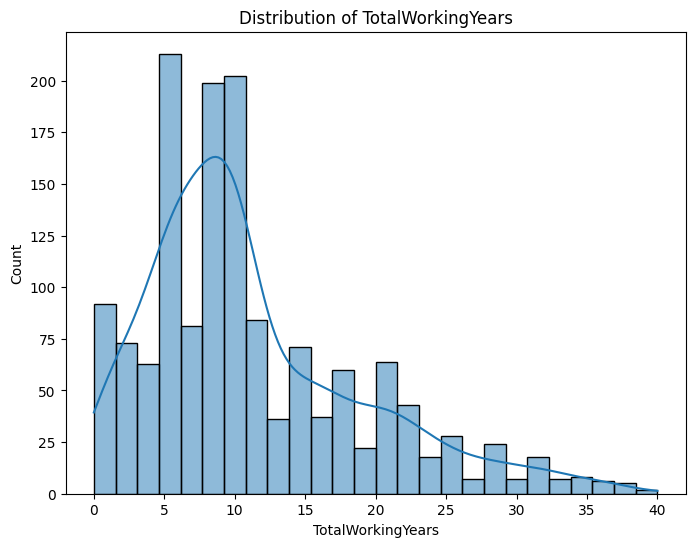

Distribution of TrainingTimesLastYear:
count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64


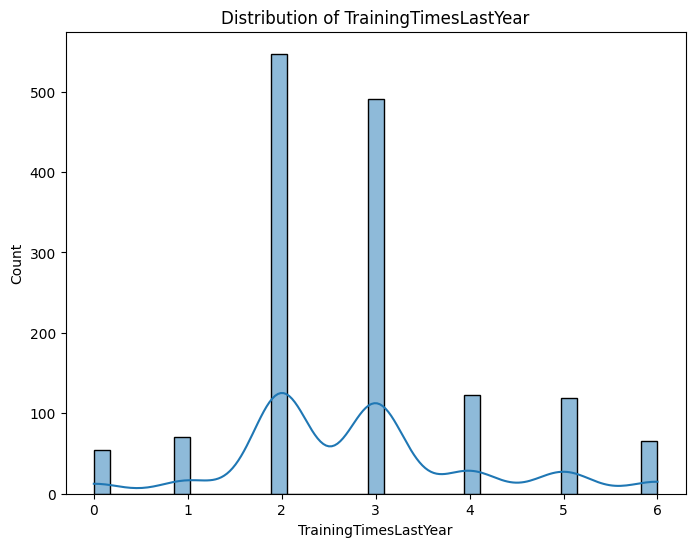

Distribution of WorkLifeBalance:
count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64


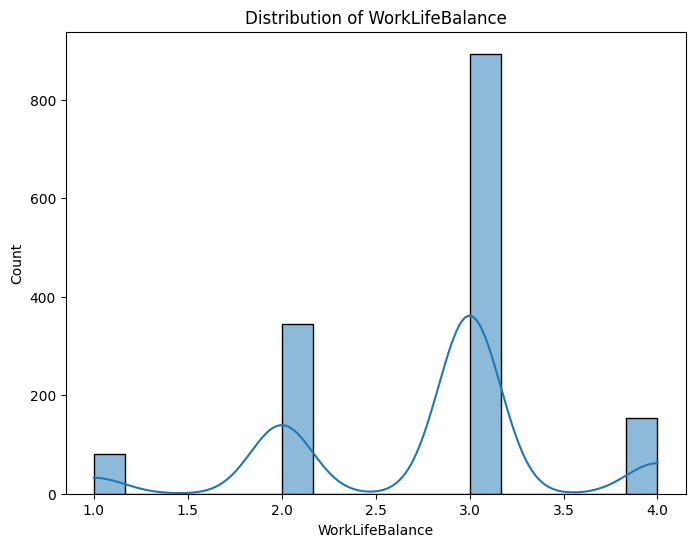

Distribution of YearsAtCompany:
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


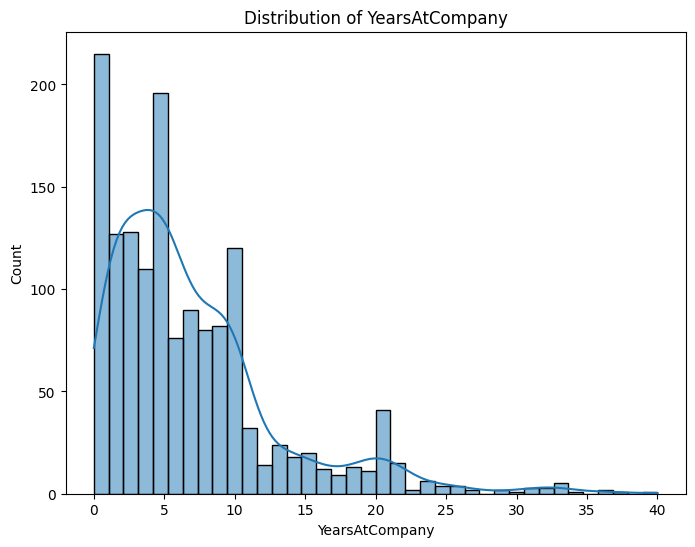

Distribution of YearsInCurrentRole:
count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64


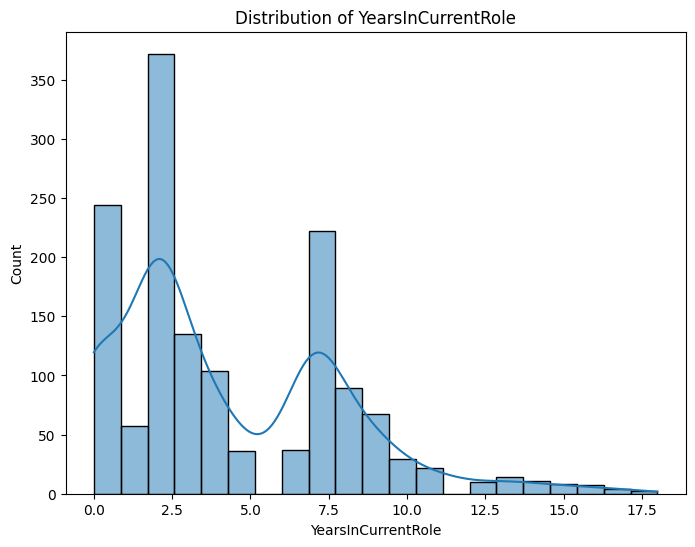

Distribution of YearsSinceLastPromotion:
count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64


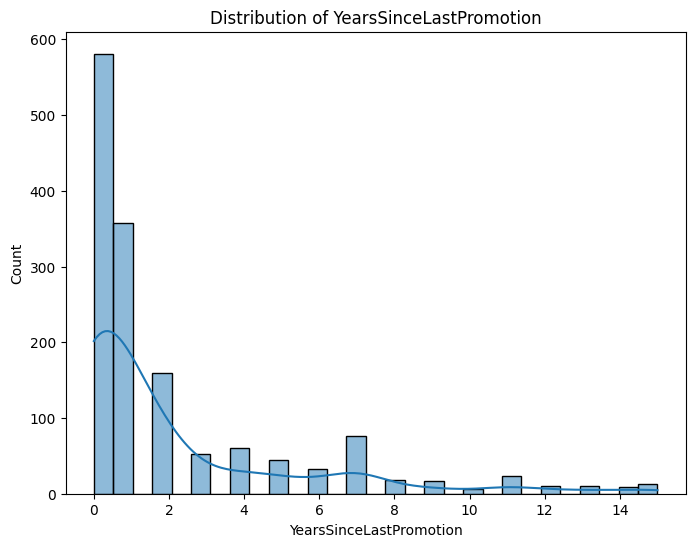

Distribution of YearsWithCurrManager:
count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64


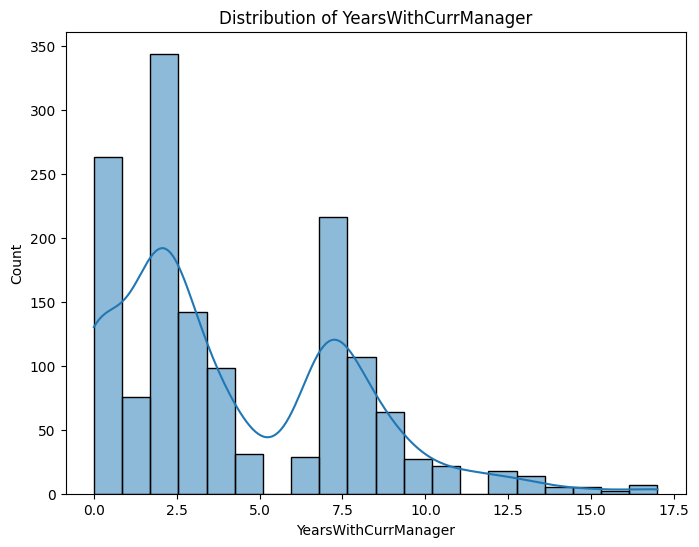

In [13]:
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"Distribution of {col}:")
        print(df[col].describe())  # Summary statistics for numeric columns
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
    elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]):
        print(f"Distribution of {col}:")
        print(df[col].value_counts())
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
        plt.show()

Dilakukan visualisasi Distribusi untuk melihat bagaimana data mendominasi dan juga nantinya sebagai pertimbangan dalam fitur model, sebagai contoh hasil dari pengamatan :

*   Umur Karyawan didominasi oleh Mid-Age yang berkisar 28-40 tahun.
*   Divisi yang memiliki karyawan terbanyak ialah Research & Development
*   Tingkat pendidikan dari Pekerja didominasi oleh sarjana dengan Educartion Field di dominasi oleh Medical dan Life Sciences.



In [78]:
df['Attrition'].value_counts(normalize=True) * 100

,proportion
Attrition,
0.0,83.081285
1.0,16.918715


disini dapat disimpulkan attrition rate sebesar 16%, yang dimana ini cukup besar untuk suatu perusahaan.

<Axes: xlabel='Attrition', ylabel='count'>

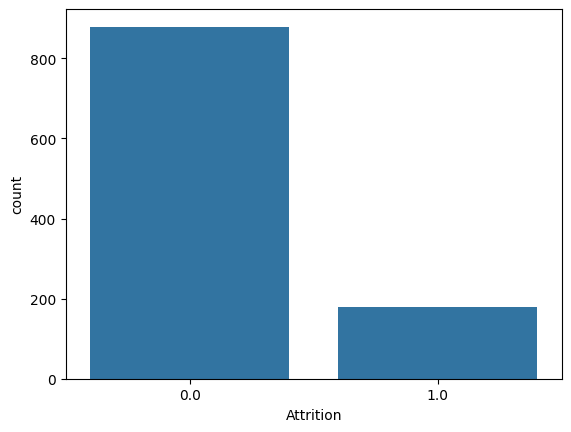

In [15]:
df['Attrition'].value_counts(normalize=True) * 100
sns.countplot(x='Attrition', data=df)

<Axes: xlabel='Age', ylabel='Count'>

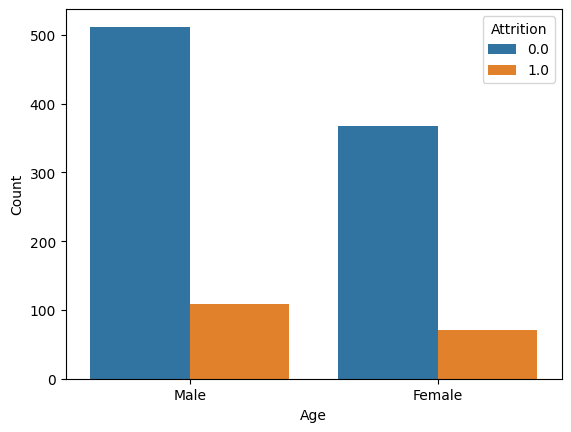

In [16]:
sns.histplot(df['Age'], kde=True)
sns.countplot(x='Gender', hue='Attrition', data=df)

Grafik menunjukkan distribusi usia antara karyawan yang tetap (Attrition = 0.0) dan yang keluar (Attrition = 1.0), dengan pembagian berdasarkan jenis kelamin.  Terlihat bahwa mayoritas karyawan yang tetap berada di kelompok usia yang lebih muda, sementara proporsi karyawan yang keluar lebih merata di antara kelompok usia.


<Axes: xlabel='OverTime', ylabel='count'>

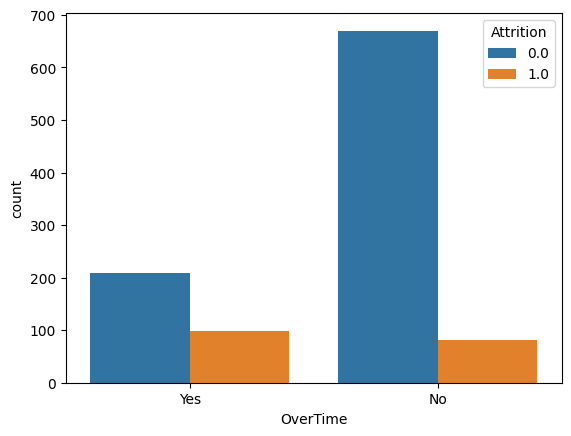

In [17]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index')
sns.countplot(x='OverTime', hue='Attrition', data=df)

Grafik menunjukkan bahwa karyawan yang bekerja lembur ("Yes") memiliki tingkat attrition yang lebih tinggi dibandingkan karyawan yang tidak bekerja lembur ("No").

<Axes: xlabel='Attrition', ylabel='Age'>

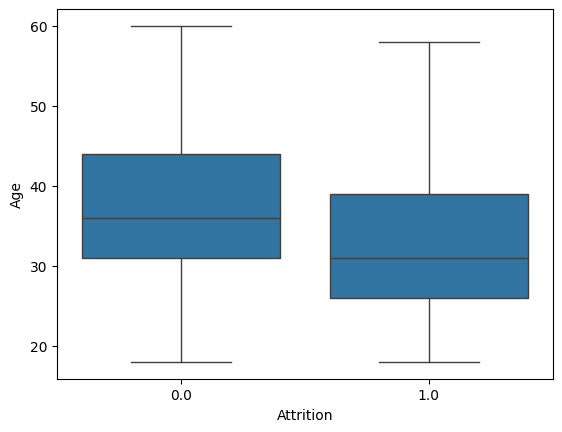

In [18]:
sns.boxplot(x='Attrition', y='Age', data=df)

Grafik menunjukkan bahwa terdapat perbedaan distribusi usia antara karyawan yang tetap dan yang keluar, dengan karyawan yang keluar cenderung lebih muda.  Meskipun rentang usia hampir sama, median usia karyawan yang tetap lebih tinggi.

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

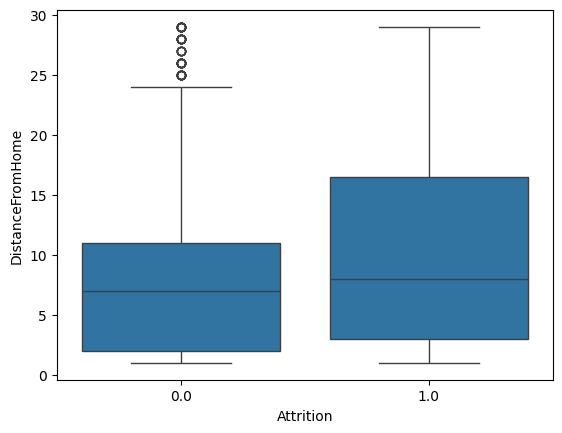

In [19]:
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)

Karyawan yang keluar ("Attrition" = 1.0) cenderung tinggal lebih jauh dari rumah dibandingkan karyawan yang tetap ("Attrition" = 0.0). dan disini terdapat Outlier yang terdeteksi, namun jika dilihat secara angka, masih tergolong wajar dan wajar.

<Axes: xlabel='JobInvolvement', ylabel='count'>

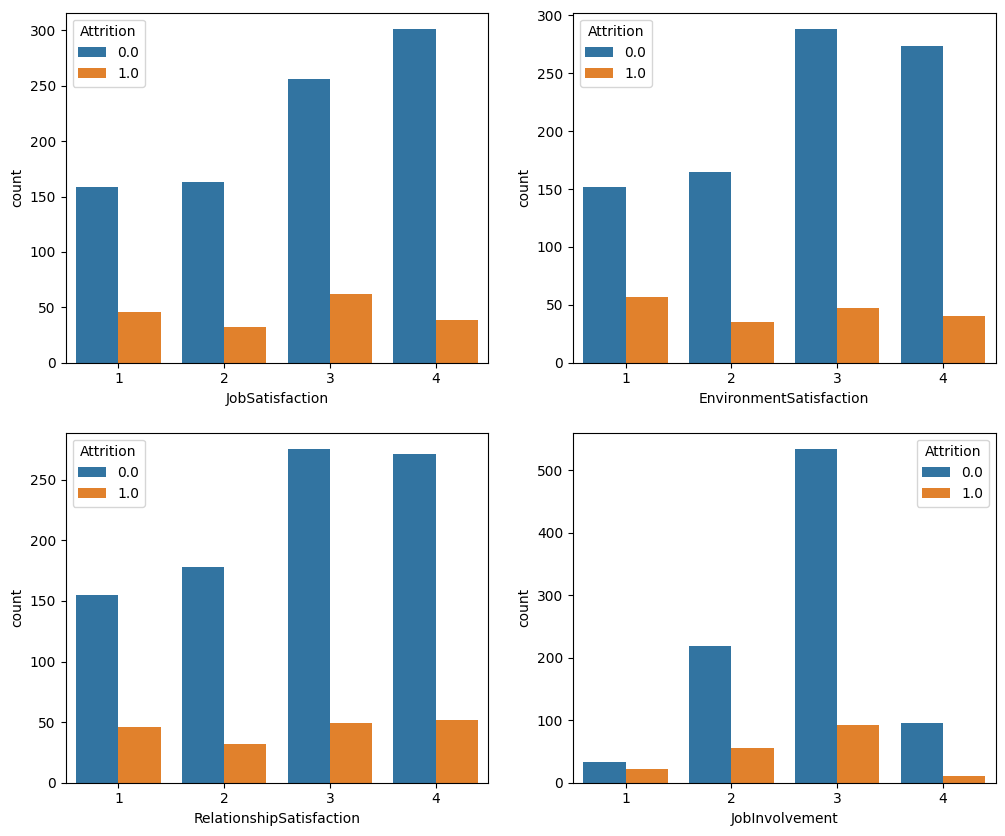

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, ax=axes[0,0])
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, ax=axes[0,1])
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df, ax=axes[1,0])
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, ax=axes[1,1])

Grafik ini (Job Satisfaction, Environment Satisfaction, Relationship Satisfaction, Job Involvement vs Attrition): Tingkat kepuasan kerja, lingkungan kerja, hubungan, dan keterlibatan kerja yang rendah dikaitkan dengan tingkat attrition yang lebih tinggi. Semakin tinggi tingkat kepuasan dan keterlibatan, semakin rendah tingkat attrition.

## Data Preparation / Preprocessing

Baris ini menghapus baris-baris data yang memiliki nilai Attrition yang hilang (missing values). dropna() adalah fungsi pandas untuk menangani missing data. subset=["Attrition"] menspesifikasikan bahwa hanya baris dengan nilai Attrition yang hilang yang akan dihapus.

In [76]:
# 1. Drop rows with missing target ('Attrition')
df_cleaned = df.dropna(subset=["Attrition"])

Penjelasan: Baris ini menghapus kolom-kolom yang dianggap tidak informatif untuk prediksi Attrition. Kolom-kolom yang dihapus adalah EmployeeId, EmployeeCount, Over18, dan StandardHours.

Alasan: EmployeeId adalah ID unik dan tidak memberikan informasi prediksi. EmployeeCount dan StandardHours kemungkinan konstan atau memiliki variasi yang sangat kecil, sehingga tidak berkontribusi pada model. Over18 mungkin redundan jika informasi usia sudah ada

In [55]:
# 3. Drop kolom tidak informatif
drop_cols = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
df_cleaned = df_cleaned.drop(columns=drop_cols)

Penjelasan: Data dipisahkan menjadi fitur (X) dan target (y). X berisi semua kolom kecuali Attrition, sedangkan y berisi kolom Attrition yang diubah tipe datanya menjadi integer (0 dan 1).

Alasan: Pemisahan fitur dan target diperlukan untuk melatih model machine learning. Model akan mempelajari hubungan antara fitur-fitur (X) dan target (y).

In [56]:
# 4. Pisahkan fitur dan target
X = df_cleaned.drop(columns=["Attrition"])
y = df_cleaned["Attrition"].astype(int)

Penjelasan: Kolom-kolom data diidentifikasi sebagai kategorikal atau numerik.

Alasan: Algoritma machine learning seringkali membutuhkan preprocessing yang berbeda untuk data kategorikal dan numerik. Data numerik mungkin perlu di-scale, sedangkan data kategorikal perlu di-encode.

In [57]:
# 5. Identifikasi tipe data
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

Penjelasan: Pipeline preprocessing dibangun untuk menangani data numerik dan kategorikal secara terpisah. Pipeline numerik menggunakan SimpleImputer untuk mengisi nilai yang hilang dengan median dan StandardScaler untuk menskalakan data. Pipeline kategorikal menggunakan SimpleImputer untuk mengisi nilai yang hilang dengan nilai yang paling sering muncul dan OneHotEncoder untuk mengkodekan data kategorikal menjadi representasi numerik. ColumnTransformer menggabungkan kedua pipeline ini.

Alasan: Data numerik dan kategorikal membutuhkan preprocessing yang berbeda. Mengisi nilai yang hilang dan menskalakan data numerik meningkatkan kinerja model. Mengkodekan data kategorikal memungkinkan model untuk memproses data tersebut.

Pengaruh: Meningkatkan kualitas data dan kinerja model. Preprocessing yang tepat dapat meningkatkan akurasi, mengurangi overfitting, dan meningkatkan stabilitas model.

In [58]:
# 6. Pipeline preprocessing
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [59]:
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [60]:
preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

## Modeling

Penjelasan: Pipeline model dibangun menggunakan ImbPipeline yang menggabungkan preprocessing, SMOTE (Synthetic Minority Over-sampling Technique), dan algoritma klasifikasi LogisticRegression. SMOTE digunakan untuk mengatasi ketidakseimbangan kelas (class imbalance) pada data.

Alasan: Data mungkin memiliki ketidakseimbangan kelas, di mana satu kelas (misalnya, Attrition = 1) jauh lebih sedikit daripada kelas lainnya. SMOTE menghasilkan data sintetis untuk kelas minoritas, sehingga menyeimbangkan kelas dan meningkatkan kinerja model.

Pengaruh: Meningkatkan kinerja model, terutama pada data dengan ketidakseimbangan kelas. SMOTE membantu model untuk belajar dari kelas minoritas dengan lebih baik.

In [66]:
# 7. Model pipeline dengan SMOTE
model_pipeline = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(max_iter=1000))
])

Penjelasan: Data dibagi menjadi data training dan data testing. stratify=y memastikan bahwa proporsi kelas dalam data training dan testing sama dengan proporsi kelas dalam data asli.

Alasan: Membagi data menjadi data training dan testing memungkinkan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya. stratify=y membantu mencegah bias dalam evaluasi model.

In [62]:
# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Penjelasan: Model dilatih menggunakan data training.

Alasan: Proses pelatihan model melibatkan pembelajaran pola dari data training.

Pengaruh: Model mempelajari hubungan antara fitur dan target dari data training.

In [71]:
# 9. Latih model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'P...
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression(max_iter=1000))])

Penjelasan: GridSearchCV digunakan untuk melakukan hyperparameter tuning. Ini mencoba berbagai kombinasi hyperparameter dan memilih kombinasi yang menghasilkan kinerja terbaik berdasarkan metrik yang ditentukan (scoring='f1').

Alasan: Hyperparameter mempengaruhi kinerja model. Hyperparameter tuning membantu menemukan kombinasi hyperparameter yang optimal untuk model tertentu dan dataset tertentu.

Pengaruh: Meningkatkan kinerja model dengan menemukan kombinasi hyperparameter yang optimal. Ini dapat meningkatkan akurasi, presisi, recall, dan F1-score model.

In [70]:
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': ['balanced'],
    'classifier__solver': ['lbfgs']  # solver untuk L2
}

grid_model = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',  # atau bisa 'roc_auc', 'recall'
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_model.fit(X_train, y_train)

print("Best Parameters:", grid_model.best_params_)
print("Best F1 Score (CV):", grid_model.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best F1 Score (CV): 0.5473560301750641


## Evaluation

In [68]:
best_model = grid_model.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       176
           1       0.36      0.81      0.50        36

    accuracy                           0.73       212
   macro avg       0.65      0.76      0.66       212
weighted avg       0.85      0.73      0.76       212

Accuracy Score: 0.7264150943396226
ROC AUC Score: 0.8148674242424242


Model menunjukkan akurasi yang cukup baik (73%), tetapi kinerja yang tidak seimbang antara kelas 0 dan 1. Recall yang tinggi untuk kelas 1 (81%) menunjukkan kemampuan model yang baik dalam mengidentifikasi kasus attrition (kelas 1), meskipun dengan presisi yang rendah (36%). Ini berarti model menghasilkan banyak false positive. F1-score yang rendah untuk kelas 1 (50%) mencerminkan ketidakseimbangan ini. ROC AUC yang cukup tinggi (81%) menunjukkan kemampuan pemisahan kelas yang baik.

Saran pengembangan:

- Perbaiki ketidakseimbangan kelas: Eksplorasi teknik oversampling atau undersampling yang lebih canggih selain SMOTE, atau coba algoritma yang lebih robust terhadap ketidakseimbangan kelas.
- Feature engineering: Eksplorasi fitur-fitur baru atau transformasi fitur yang ada untuk meningkatkan kemampuan model dalam membedakan kelas.
- Model tuning yang lebih ekstensif: Eksplorasi algoritma klasifikasi lain dan lakukan hyperparameter tuning yang lebih komprehensif.
- Evaluasi metrik lain: Pertimbangkan metrik lain seperti precision-recall curve untuk mendapatkan pemahaman yang lebih komprehensif tentang kinerja model.

In [73]:
with open("model_attrition.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)

print("✅ Model berhasil dilatih dan disimpan sebagai 'model_attrition.pkl'")

✅ Model berhasil dilatih dan disimpan sebagai 'model_attrition.pkl'


In [77]:
df_cleaned.to_csv('df_cleaned.csv', index=False)